In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt   #Esto es para poder hacer gráficos
import seaborn as sns
import re

In [2]:
dfcompletasinNan= pd.read_csv("datos/dfcompletasinNan.csv", sep= ",", index_col= 0, parse_dates= ["data lançamento"])
pd.set_option("display.max_columns", None)

**Comentario de los datos**


- La categoría con más peso de entre todas las categorías económicas fue Receitas Corrientes con un 93,7% del total. Mientras que el resto estaba distribuido en las otras 4 categorías restantes.  

- En cuanto a las proporciones de cada categoría respecto a ingresos totales, las categorías que más ingresos recibieron fueron: Recitas de Capital y Receitas Corrientes, con un 49.5% y un 47.9% respectivamente.  
 
- Además, en las diferencias en media se observó que en Receitas de Capital y en Sem Informaçao las previsiones fueron mayores que los ingresos recibidos(-0,075MM). Por otro lado, en Receitas de Capital - Intra Orçamentarias las previsiones fueron menores a los ingresos recibidos (0.120MM). Las otras dos categorías no cuentan con una gran diferencia en media, lo que quiere decir que las previsiones fueron parecidas a los ingresos recibidos.
 
*Análisis de evolución temporal:*    


- Hasta 2015 parece que los ingresos recibidos y previstos, en cuanto a corrientes y capital, eran bastantes parecidos. Pero luego, en 2016, hubo un aumento en los recibidos frente a los previstos y en 2017 hubo una bajada en recibidos frente a los previstos (particularmente en Ingresos Corrientes).   

- En el año 2016, en las previsiones hubo casi 1,000MM de ingresos sin información.  

- En 2018, en recibidos se vio un pequeño aumento lo que no concuerda con las previsiones ya que Receitas de Capital alcanzó los 2,000MM y Correntes apenas llegó a 1,000MMM. Sin embargo, en recibidos ambos estaban en torno a 1250MM. Luego en 2019, los recibidos siguieron aumentando levemente mientras que en los ingresos previstos, corrientes alcanzó los 2,200MM y capital se redujo a 1,300MM.  

- Finalmente, En 2021 mientras que los recibidos en Capital cayeron a los 1250MM, en las presiviones se apuntaron 2,400MM. 

En resumen, hay mucha más variacion en las previsiones que en los valores recibidos ya que se podría estar intentando cubrir irregularidades (quizá debido a posibles actos de corrupción).



*Respecto a las subejecuciones y sobre ejecuciones, podemos señalar que:*   
- Receitas Correntes tiene subejecucion, porque se ha recibido menos de lo previsto.   

- Receitas Correntes - intra-orçamentárias, tiene sobreejecucion, porque se ha recibido más de lo previsto  

- Receitas de Capital: subejecucion, porque se ha recibido menos de lo previsto    

- Receitas de Capital - intra-orçamentárias. sobrejecucion, porque se ha recibido más de lo previsto  

- Sem informação: subejecucion, porque se ha recibido menos de lo previsto

Esto se traduce, hablando de números, en un descuadre de -3,271MM.  



*Comparando los distintos ingresos observamos que:*  

- Los valores previstos de corrientes están ligeramente por encima  de corrientes recibidos y lanzados (en ingresos lanzados falta por reflejar uno 8,000MM).  

- Los Sem InformaÇcao, tienen un descuadre con respecto a las previsiones de 900MM.   

- En capital hay un descuadre entre lo previsto y lo realizado de 2,000MM y de 13,000MM.

En las otras 2 categorías, apenas hay datos relevantes para poder tomar en consideración.  


*Con respecto a la distribución en los valores previsto y realizados podemos decir que en todas las categorías, excepto "Sem informação", los ingresos realizados tienden a ser inferiores a los previstos (diferencia negativa)*    

- La categoría "Receitas de Capital" es la que presenta una mayor diferencia negativa, mientras que "Sem informação" tiene valores más cercanos a cero.

- La variabilidad en las categorías no es muy alta, excepto en "Receitas Correntes - intra-orçamentárias", donde hay una mayor dispersión de los datos.

Este análisis muestra que en la mayoría de las categorías económicas los ingresos realizados no alcanzan los ingresos previstos, lo que podría señalar problemas de cumplimiento en los ingresos previstos.


***Recomendaciones:***    

Dado lo observado durante todo el proceso de análisis y exploración así como tras haber observado detenidamente la visualización, se hacen las siguientes recomendaciones al gobierno brasileño:  

- En primer lugar, se recomienda encarecidamente implementar auditorías más frecuentes y rigurosas, sobre todo en áreas con fluctuaciones grandes, para mitigar casos como la corrupción mencionada así como formar a los responsables de las previsiones de ingresos para mejorar las estimaciones de ingresos en las diferentes categorías económicas y mitigar los grandes descuadres observados.  

- En segundo lugar, una recomendación útil sería usar patrones históricos como los identificados entre 2015 y 2018, para ajustar las previsiones de ingresos y que éstos estén más alineados con la realidad económica.  

- En tercer lugar, desarrollar sistemas de monitoreo trimestral o semestral para ajustar las previsiones sobre la marcha, evitando grandes diferencias entre los ingresos previstos y los recibidos así como analizar a fondo categorías como "Sem informação", para identificar y corregir posibles errores o fuentes de ingresos poco fiables.

- Finalmente, se recomendaría dado que "Receitas de Capital" presenta una gran variabilidad en comparación con las previsiones, sería útil revisar el modelo de previsión y considerar factores económicos externos que puedan estar afectando e incluso desarrollar programas de machine learning para que identifique y haga propuestas sobre cómo sanear las cuentas.



**VISUALIZACIÓN**

In [3]:
media_ingresos = dfcompletasinNan.groupby('categoria econômica')[['valor realizado', 'valor previsto atualizado']].mean()
media_ingresos['diferencia'] = media_ingresos['valor realizado'] - media_ingresos['valor previsto atualizado']
media_ingresos['diferencia']

categoria econômica
Receitas Correntes                          -0.000588
Receitas Correntes - intra-orçamentárias     0.001333
Receitas de Capital                         -0.081520
Receitas de Capital - intra-orçamentárias    0.111905
Sem informação                              -0.042670
Name: diferencia, dtype: float64

In [4]:
df_prueba = dfcompletasinNan.groupby('categoria econômica')[['valor previsto atualizado', 'valor lançado', 'valor realizado']].sum()
df_prueba['diferencia'] = df_prueba['valor realizado'] - df_prueba['valor previsto atualizado']
df_prueba ### se ha recibido menos (subejecución) o más (sobre ejecución)
# subejecucion, porque se ha recibido menos de lo previsto
# sobreejecucion, porque se ha recibido más de lo previsto
# subejecucion, porque se ha recibido menos de lo previsto
# sobrejecucion, porque se ha recibido más de lo previsto
# subejecucion, porque se ha recibido menos de lo previsto


,valor previsto atualizado,valor lançado,valor realizado,diferencia
categoria econômica,,,,
Receitas Correntes,11201.661419,2409.270503,10709.876136,-491.785283
Receitas Correntes - intra-orçamentárias,246.238214,0.000000,264.709126,18.470912
Receitas de Capital,13137.699513,0.000251,11048.919013,-2088.780500
Receitas de Capital - intra-orçamentárias,10.808412,0.000000,20.096501,9.288090
Sem informação,1011.238761,166.559932,293.449379,-717.789382


In [5]:
proporcioncat= dfcompletasinNan["categoria econômica"].value_counts(normalize= True)*100
proporcioncat

categoria econômica
Receitas Correntes                           93.680431
Receitas de Capital                           2.871645
Sem informação                                1.885291
Receitas Correntes - intra-orçamentárias      1.553331
Receitas de Capital - intra-orçamentárias     0.009302
Name: proportion, dtype: float64

In [6]:
Por_ano_cat= dfcompletasinNan.groupby(["ano exercício", "categoria econômica"])[["valor previsto atualizado", "valor lançado", "valor realizado"]].sum()
Por_ano_cat

valor previsto atualizado  \
ano exercício categoria econômica                                                    
2013          Receitas Correntes                                        927.330553   
              Receitas Correntes - intra-orçamentárias                   18.123654   
              Receitas de Capital                                       854.744005   
              Sem informação                                             29.134209   
2014          Receitas Correntes                                       1141.970307   
              Receitas Correntes - intra-orçamentárias                   23.612741   
              Receitas de Capital                                       976.888235   
              Receitas de Capital - intra-orçamentárias                   0.000000   
              Sem informação                                              6.566362   
2015          Receitas Correntes                                       1149.841403   
              Receitas Correntes - intra-orçamentárias                   36.667034   
              Receitas de Capital                                      1351.126364   
              Receitas de Capital - intra-orçamentárias                   0.000000   
              Sem informação                                             10.576045   
2016          Receitas Correntes                                       1227.026766   
              Receitas Correntes - intra-orçamentárias                   76.315022   
              Receitas de Capital                                      1423.628500   
              Receitas de Capital - intra-orçamentárias                   0.000000   
              Sem informação                                            925.803597   
2017          Receitas Correntes                                       1671.952303   
              Receitas Correntes - intra-orçamentárias                    0.653875   
              Receitas de Capital                                      1004.199364   
              Receitas de Capital - intra-orçamentárias                   0.000000   
              Sem informação                                              4.857758   
2018          Receitas Correntes                                       1011.782202   
              Receitas Correntes - intra-orçamentárias                   56.241361   
              Receitas de Capital                                      1985.782639   
              Receitas de Capital - intra-orçamentárias                   4.436046   
              Sem informação                                              3.433476   
2019          Receitas Correntes                                       2219.621189   
              Receitas Correntes - intra-orçamentárias                    0.830730   
              Receitas de Capital                                      1272.712676   
              Receitas de Capital - intra-orçamentárias                   6.372366   
              Sem informação                                              1.268622   
2020          Receitas Correntes                                        737.047991   
              Receitas Correntes - intra-orçamentárias                   25.250540   
              Receitas de Capital                                      1795.492960   
              Receitas de Capital - intra-orçamentárias                   0.000000   
              Sem informação                                             20.760869   
2021          Receitas Correntes                                       1115.088705   
              Receitas Correntes - intra-orçamentárias                    8.543255   
              Receitas de Capital                                      2473.124769   
              Receitas de Capital - intra-orçamentárias                   0.000000   
              Sem informação                                              8.837822   

                                                         valor lançado  \
ano exercício categoria ec

In [7]:
Por_ano_cat.groupby("categoria econômica")["valor realizado"].sum()

categoria econômica
Receitas Correntes                           10709.876136
Receitas Correntes - intra-orçamentárias       264.709126
Receitas de Capital                          11048.919013
Receitas de Capital - intra-orçamentárias       20.096501
Sem informação                                 293.449379
Name: valor realizado, dtype: float64

In [8]:
dfcompletasinNan.groupby("categoria econômica")["valor realizado"].sum()

categoria econômica
Receitas Correntes                           10709.876136
Receitas Correntes - intra-orçamentárias       264.709126
Receitas de Capital                          11048.919013
Receitas de Capital - intra-orçamentárias       20.096501
Sem informação                                 293.449379
Name: valor realizado, dtype: float64

In [9]:

Por_ano_cat.groupby("categoria econômica")["valor realizado"].mean()

categoria econômica
Receitas Correntes                           1189.986237
Receitas Correntes - intra-orçamentárias       29.412125
Receitas de Capital                          1227.657668
Receitas de Capital - intra-orçamentárias       2.512063
Sem informação                                 32.605487
Name: valor realizado, dtype: float64

In [10]:
dfcompletasinNan.groupby("categoria econômica")["valor realizado"].mean()

categoria econômica
Receitas Correntes                           0.012813
Receitas Correntes - intra-orçamentárias     0.019099
Receitas de Capital                          0.431211
Receitas de Capital - intra-orçamentárias    0.242127
Sem informação                               0.017444
Name: valor realizado, dtype: float64

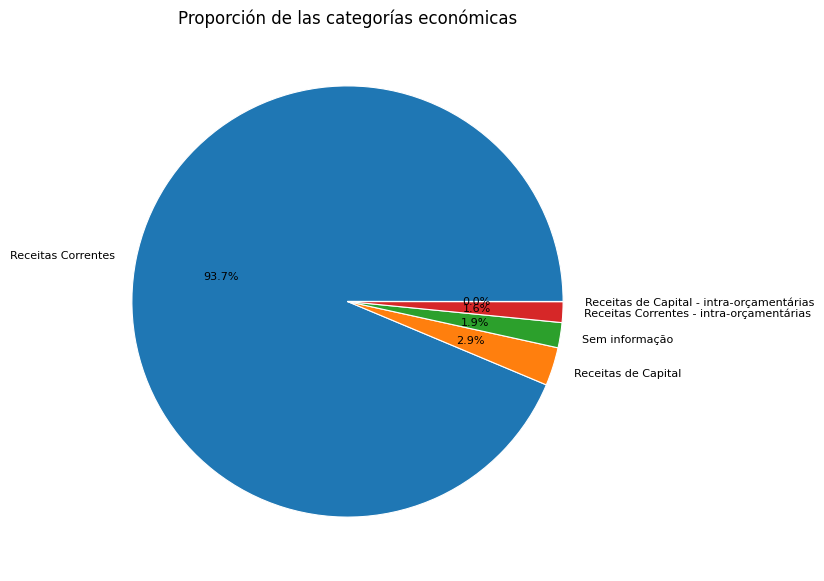

In [11]:
categorias= ["Receitas Correntes","Receitas de Capital", "Sem informação", "Receitas Correntes - intra-orçamentárias", "Receitas de Capital - intra-orçamentárias"]
plt.figure(figsize=(9,7))
plt.pie(proporcioncat, labels= categorias, labeldistance=1.1, wedgeprops = { 'linewidth' : 0.8, 'edgecolor' : 'white' }, autopct= '%1.1f%%', textprops={'fontsize': 8}, startangle= 0)
plt.title("Proporción de las categorías económicas");

In [12]:


proporcion= dfcompletasinNan.groupby("categoria econômica")[['valor realizado']].sum() #No se puede meter tal cual porque tienen dos dimensiones

valores= proporcion["valor realizado"].values
categorias= proporcion.index    #Porque al ponerlo en una lista, no asocia el label a su valor por eso se usa index

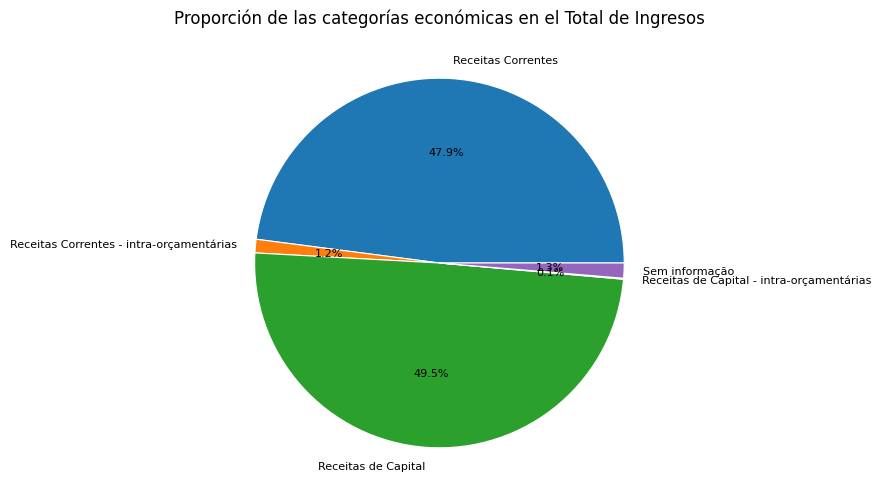

In [13]:
plt.figure(figsize=(8,6))
plt.pie(valores, labels= categorias, labeldistance=1.1, wedgeprops = { 'linewidth' : 0.8, 'edgecolor' : 'white' }, autopct= '%1.1f%%', textprops={'fontsize': 8}, startangle= 0)
plt.title("Proporción de las categorías económicas en el Total de Ingresos");

In [14]:

media_ingresos = dfcompletasinNan.groupby('categoria econômica')[['valor realizado', 'valor previsto atualizado']].mean()
media_ingresos['diferencia'] = media_ingresos['valor realizado'] - media_ingresos['valor previsto atualizado']
media_ingresos['diferencia']

categoria econômica
Receitas Correntes                          -0.000588
Receitas Correntes - intra-orçamentárias     0.001333
Receitas de Capital                         -0.081520
Receitas de Capital - intra-orçamentárias    0.111905
Sem informação                              -0.042670
Name: diferencia, dtype: float64

C:\Users\jaime\AppData\Local\Temp\ipykernel_10376\3994078961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= media_ingresos.index, y= media_ingresos['diferencia'], palette='mako')


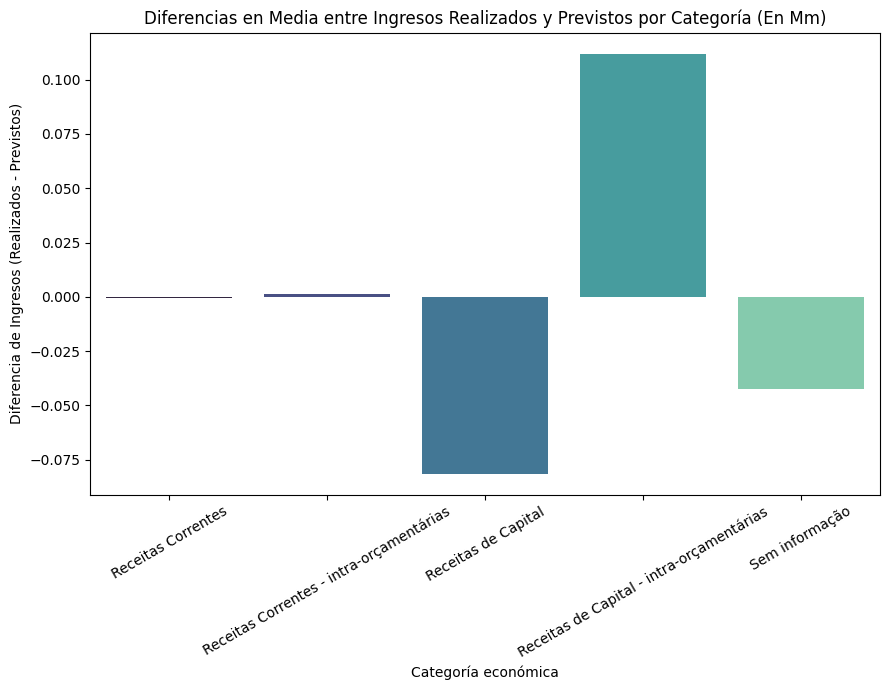

In [15]:
plt.figure(figsize=(9,7))
sns.barplot(x= media_ingresos.index, y= media_ingresos['diferencia'], palette='mako')
plt.title('Diferencias en Media entre Ingresos Realizados y Previstos por Categoría (En Mm)')
plt.xlabel('Categoría económica')
plt.ylabel('Diferencia de Ingresos (Realizados - Previstos)')
plt.xticks(rotation=30) 
plt.tight_layout();


In [16]:
df_cat_ingresosre = dfcompletasinNan.groupby('categoria econômica')['valor realizado'].sum().reset_index()
df_cat_ingresosla = dfcompletasinNan.groupby('categoria econômica')['valor lançado'].sum().reset_index()
df_cat_ingresos = dfcompletasinNan.groupby('categoria econômica')['valor previsto atualizado'].sum().reset_index()

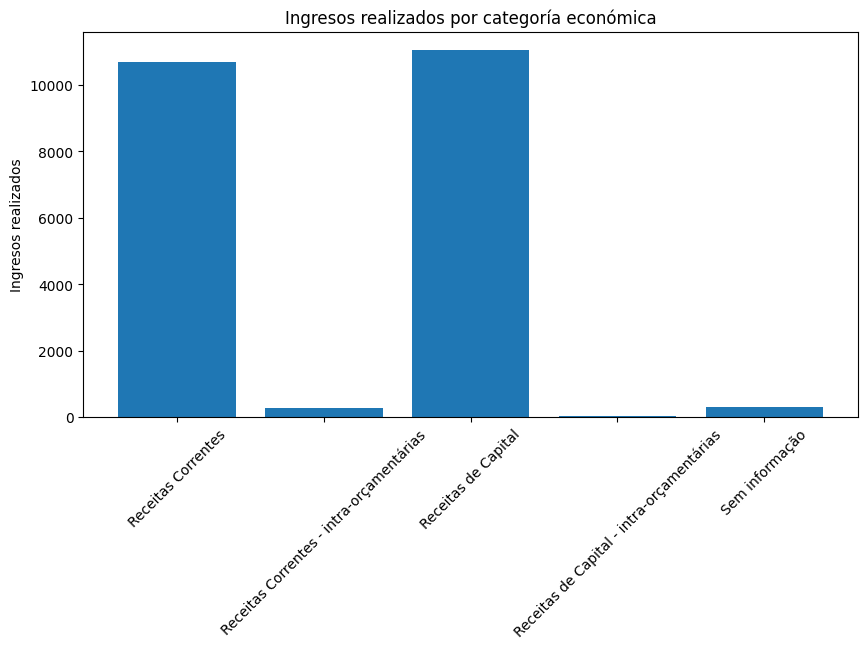

In [17]:


plt.figure(figsize=(10,5))
plt.bar(df_cat_ingresosre['categoria econômica'], df_cat_ingresosre['valor realizado'])
plt.xticks(rotation=45)
plt.title('Ingresos realizados por categoría económica')
plt.ylabel('Ingresos realizados')
plt.show()




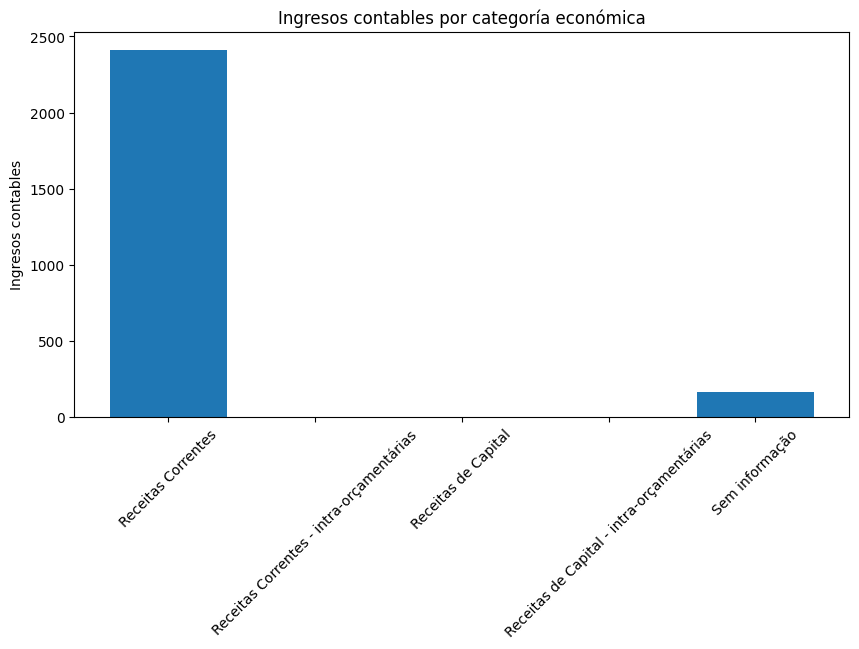

In [18]:
plt.figure(figsize=(10,5))
plt.bar(df_cat_ingresosla['categoria econômica'], df_cat_ingresosla['valor lançado'])
plt.xticks(rotation=45)
plt.title('Ingresos contables por categoría económica')
plt.ylabel('Ingresos contables')
plt.show()

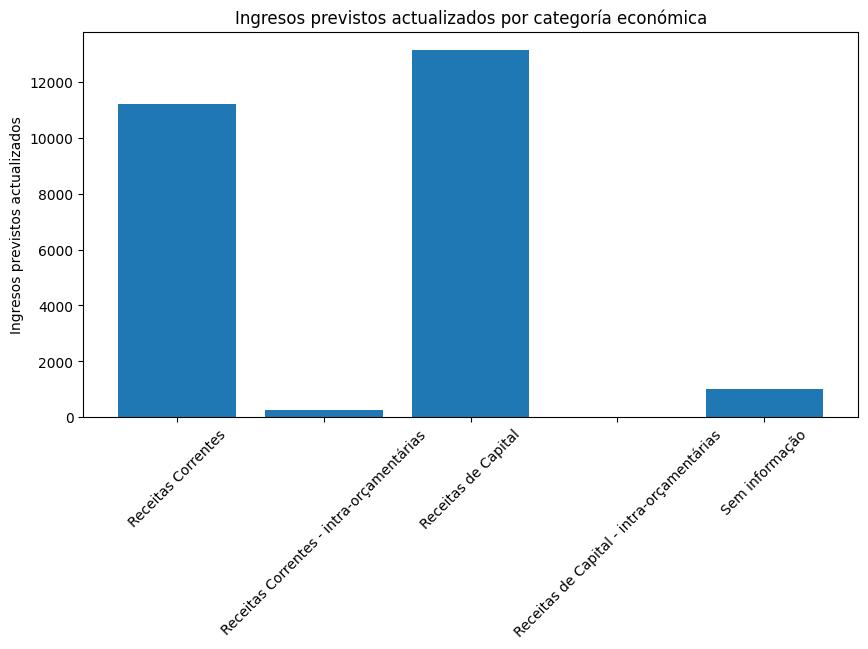

In [19]:
plt.figure(figsize=(10,5))
plt.bar(df_cat_ingresos['categoria econômica'], df_cat_ingresos['valor previsto atualizado'])
plt.xticks(rotation=45)
plt.title('Ingresos previstos actualizados por categoría económica')
plt.ylabel('Ingresos previstos actualizados')
plt.show()

C:\Users\jaime\AppData\Local\Temp\ipykernel_10376\4022845050.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(df_cat_ingresosre['categoria econômica'], rotation=45)
C:\Users\jaime\AppData\Local\Temp\ipykernel_10376\4022845050.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(df_cat_ingresosla['categoria econômica'], rotation=45)
C:\Users\jaime\AppData\Local\Temp\ipykernel_10376\4022845050.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(df_cat_ingresos['categoria econômica'], rotation=45)


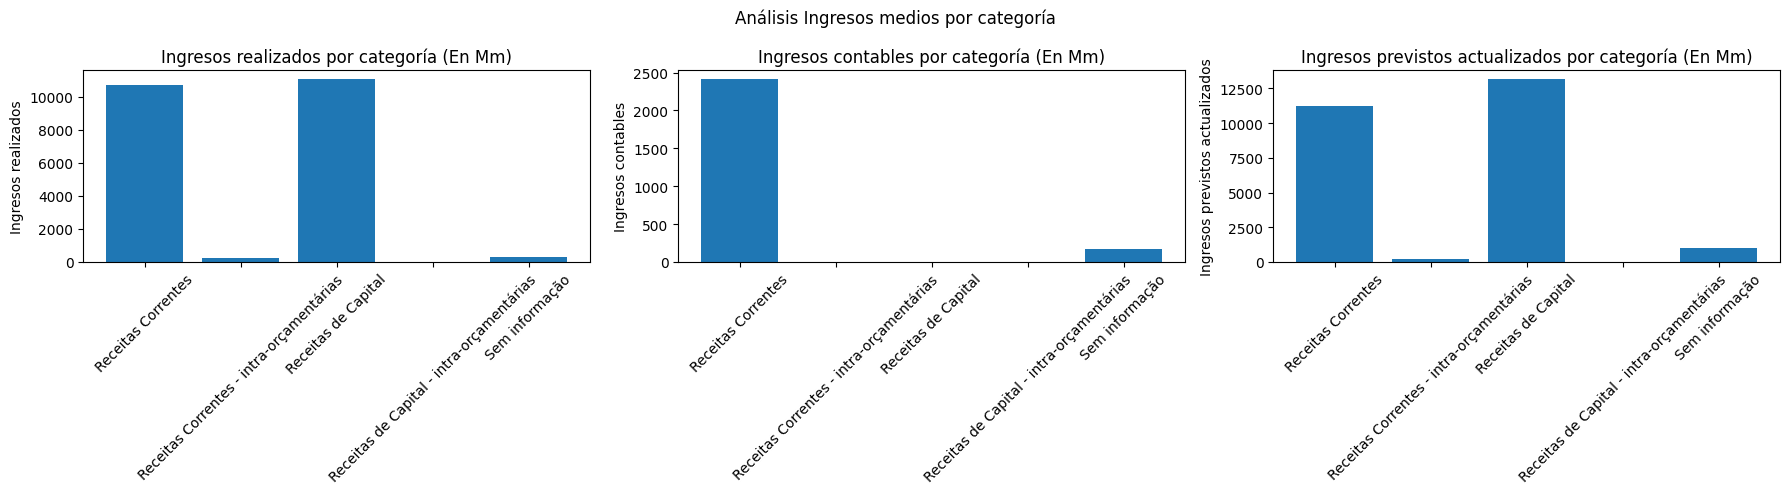

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize= (18,5))
axes[0].bar(df_cat_ingresosre['categoria econômica'], df_cat_ingresosre['valor realizado'])
axes[0].set_title('Ingresos realizados por categoría (En Mm)')
axes[0].set_xticklabels(df_cat_ingresosre['categoria econômica'], rotation=45)
axes[0].set_ylabel('Ingresos realizados')

axes[1].bar(df_cat_ingresosla['categoria econômica'], df_cat_ingresosla['valor lançado'])
axes[1].set_title('Ingresos contables por categoría (En Mm)')
axes[1].set_xticklabels(df_cat_ingresosla['categoria econômica'], rotation=45)
axes[1].set_ylabel('Ingresos contables')

axes[2].bar(df_cat_ingresos['categoria econômica'], df_cat_ingresos['valor previsto atualizado'])
axes[2].set_title('Ingresos previstos actualizados por categoría (En Mm)')
axes[2].set_xticklabels(df_cat_ingresos['categoria econômica'], rotation=45)
axes[2].set_ylabel('Ingresos previstos actualizados')
plt.suptitle("Análisis Ingresos medios por categoría") 
plt.tight_layout();

In [21]:
dfcompletasinNan.describe()

,código órgão superior,código órgão,código unidade gestora,valor previsto atualizado,valor lançado,valor realizado,data lançamento,ano exercício,porcentaje ejecutado,Proporcion respecto a ingresos
count,892276.000000,892276.000000,892276.000000,892276.000000,892276.000000,8.922760e+05,892276,892276.000000,8.922760e+05,8.922760e+05
mean,31107.184324,30669.240741,226846.177831,0.028699,0.002887,2.503379e-02,2018-09-24 21:17:05.295311360,2018.038568,9.123469e+00,1.120729e-04
min,0.000000,0.000000,0.000000,-0.214774,-148.347267,-1.562859e+02,2013-12-31 00:00:00,2013.000000,-1.145519e+05,-6.996713e-01
25%,25000.000000,25000.000000,153167.000000,0.000000,0.000000,2.632500e-07,2017-03-30 00:00:00,2016.000000,0.000000e+00,1.178535e-09
50%,26000.000000,26291.000000,168002.000000,0.000000,0.000000,3.045000e-06,2018-09-05 00:00:00,2018.000000,0.000000e+00,1.363206e-08
75%,36000.000000,34902.000000,250088.000000,0.000000,0.000000,4.116238e-05,2020-02-20 00:00:00,2019.000000,0.000000e+00,1.842785e-07
max,81000.000000,91214.000000,913001.000000,1603.521711,357.160678,7.711177e+02,2021-12-03 00:00:00,2021.000000,1.873159e+06,3.452191e+00
std,11791.470156,11363.097480,146200.593063,3.590223,0.735083,1.458432e+00,NaN,1.719376,2.734096e+03,6.529206e-03


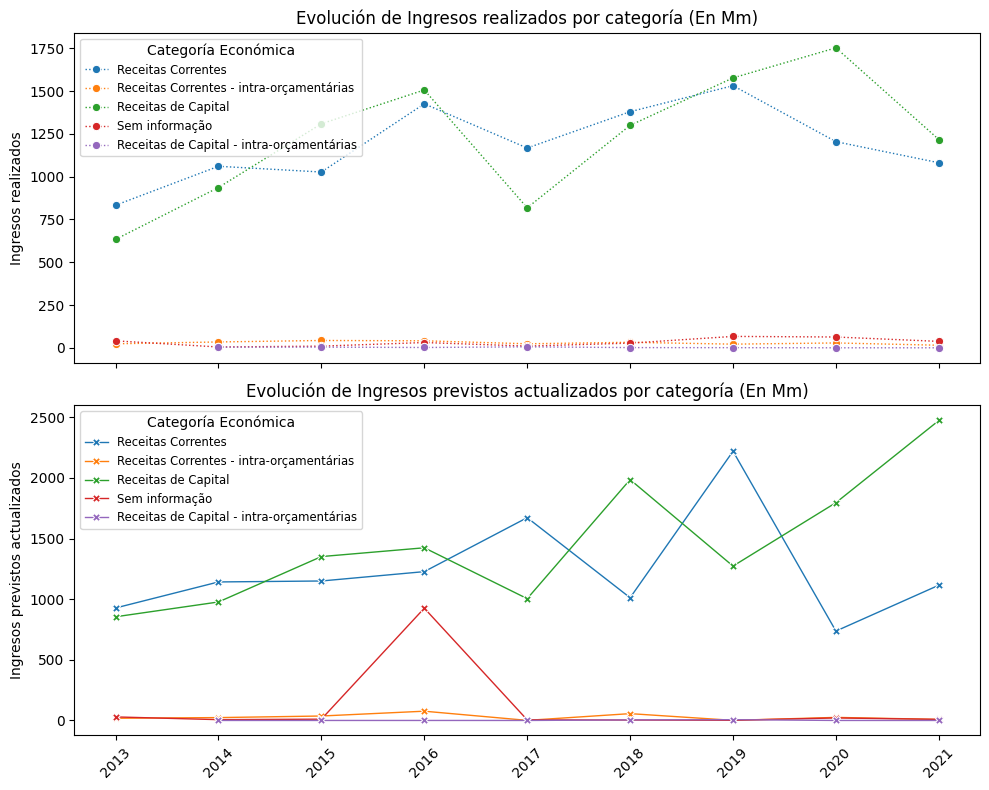

In [22]:
fig,axes = plt.subplots(nrows= 2, ncols= 1, figsize= (10,8), sharex= True)
sns.lineplot(x="ano exercício", y="valor realizado", hue='categoria econômica', data= Por_ano_cat, linewidth = 1, linestyle = "dotted", marker = "o", ax= axes[0])
axes[0].set_title('Evolución de Ingresos realizados por categoría (En Mm)')
plt.xticks(rotation=45)
axes[0].set_xlabel('')
axes[0].set_ylabel('Ingresos realizados')


axes[0].legend(title='Categoría Económica', fontsize='small', title_fontsize='medium')  



sns.lineplot(x="ano exercício", y="valor previsto atualizado", hue='categoria econômica', data=Por_ano_cat, linewidth = 1, marker = "X",ax= axes[1])
axes[1].set_title('Evolución de Ingresos previstos actualizados por categoría (En Mm)')
plt.xticks(rotation=45)
axes[1].set_xlabel('')
axes[1].set_ylabel('Ingresos previstos actualizados')
axes[1].legend(title='Categoría Económica', fontsize='small', title_fontsize='medium') 
plt.tight_layout();

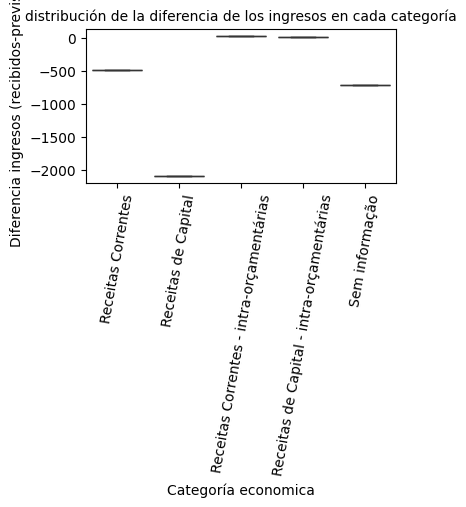

In [23]:
plt.figure(figsize= (4,2))
sns.boxplot(x = "categoria econômica",
            y = "diferencia",
            data = df_prueba, 
            palette = 'viridis', 
            hue = "categoria econômica",
            order = ["Receitas Correntes", "Receitas de Capital", "Receitas Correntes - intra-orçamentárias", "Receitas de Capital - intra-orçamentárias", "Sem informação"], 
)


plt.title("distribución de la diferencia de los ingresos en cada categoría", fontsize = 10)

plt.xlabel("Categoría economica", fontsize = 10)
plt.ylabel("Diferencia ingresos (recibidos-previstos)", fontsize = 10)
plt.xticks(rotation= 80);